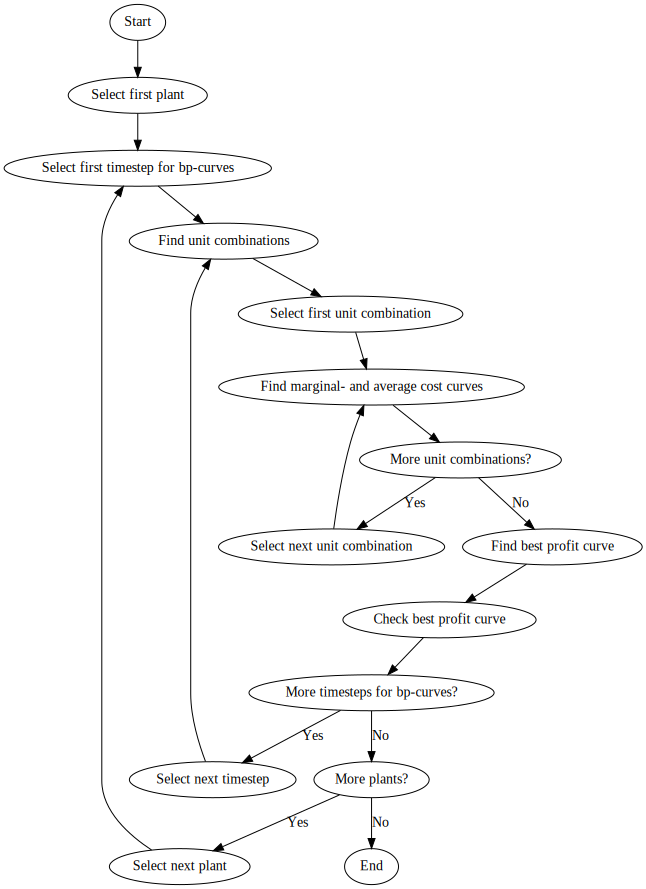

In [70]:
from graphviz import Digraph

g = Digraph(graph_attr={"rankdir": "TB","concentrate": "true"}, comment="Best profit algorithm")

g.node('start', label="Start")
g.node('init_plant', label="Select first plant")
g.node('more_plants', label="More plants?")
g.node('next_plant', label="Select next plant")
g.node('init_t', label="Select first timestep for bp-curves")
g.node('more_t', label="More timesteps for bp-curves?")
g.node('next_t', label="Select next timestep")
g.node('find_comb', label="Find unit combinations")
g.node('init_comb', label="Select first unit combination")
g.node('more_combs', label="More unit combinations?")
g.node('next_comb', label="Select next unit combination")
g.node('find_mc_ac', label="Find marginal- and average cost curves")
g.node('find_bp', label="Find best profit curve")
g.node('check_bp', label="Check best profit curve")


g.edge('start', 'init_plant')
g.edge('init_plant', 'init_t')
g.edge('init_t', 'find_comb')
g.edge('find_comb', 'init_comb')
g.edge('init_comb', 'find_mc_ac')
g.edge('find_mc_ac', 'more_combs')
g.edge('more_combs', 'find_bp', "No")
g.edge('find_bp', 'check_bp')
g.edge('check_bp', 'more_t')
g.edge('more_t', 'more_plants', "No")
g.edge('more_plants', 'End', "No")

g.edge('more_combs','next_comb', "Yes")
g.edge('next_comb', 'find_mc_ac')
g.edge('more_t','next_t', "Yes")
g.edge('next_t', 'find_comb')
g.edge('more_plants','next_plant', "Yes")
g.edge('next_plant', 'init_t')

#c = Digraph('child')
#c.attr(rank='same')
#c.node('init_plant')
#c.node('init_t')
#c.node('find_comb')
#c.node('init_comb')
#c.node('find_mc_ac')
#c.node('more_combs')
#c.node('find_bp')
#c.node('check_bp')
#c.node('more_t')
#c.node('more_plants')
#c.node('End')
#g.subgraph(c)

g

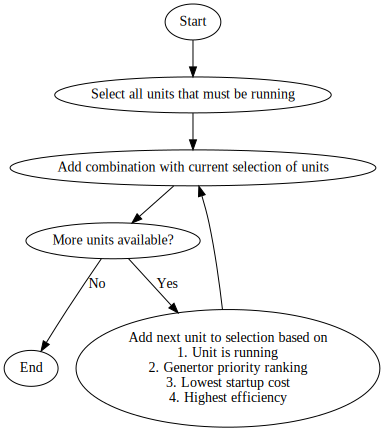

In [67]:
from graphviz import Digraph

g = Digraph(comment="Find unit combinations for given timestep")
#graph_attr={"rankdir": "LR"}, 
#graph_attr={"splines": "ortho"}, 
g.node('start', label="Start")
g.node('run_units', label="Select all units that must be running")
g.node('add_comb', label="Add combination with current selection of units")
g.node('more_units', label="More units available?")
g.node('add_unit', label="Add next unit to selection based on\n 1. Unit is running \n2. Genertor priority ranking\n3. Lowest startup cost\n4. Highest efficiency")
g.node('end', label="End")

g.edge('start', 'run_units')
g.edge('run_units', 'add_comb')
g.edge('add_comb', 'more_units')
g.edge('more_units', 'add_unit', "Yes")
g.edge('add_unit', 'add_comb')
g.edge('more_units', 'end', "No")

#c = Digraph('child')
#c.attr(rank='same')
#c.node('start')
#c.node('run_units')
#c.node('add_comb')
#c.node('more_units')
#c.node('end')
#
#g.subgraph(c)

#c = Digraph('child')
#c.attr(rank='same')
#c.node('more_running_units')
#c.node('add_running_unit')
#
#d = Digraph('child2')
#d.attr(rank='same')
#d.node('more_available_units')
#d.node('add_available_unit')
#
#g.subgraph(c)
#g.subgraph(d)

g

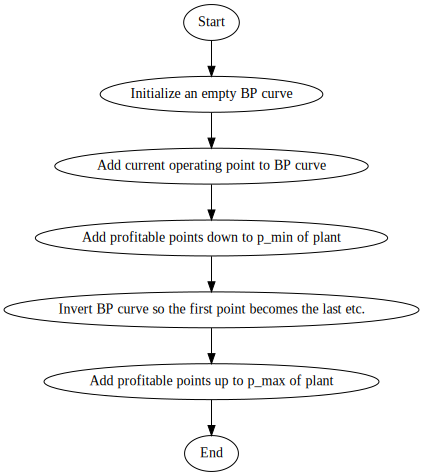

In [4]:
from graphviz import Digraph

g = Digraph(comment="Find best profit curve")

g.node('start', label="Start")
g.node('init_list', label="Initialize an empty BP curve")
g.node('add_run_point', label="Add current operating point to BP curve")
g.node('add_down_points', label="Add profitable points down to p_min of plant")
g.node('invert_list', label="Invert BP curve so the first point becomes the last etc.")
g.node('add_up_points', label="Add profitable points up to p_max of plant")
g.node('end', label="End")

g.edge('start', 'init_list')
g.edge('init_list', 'add_run_point')
g.edge('add_run_point', 'add_down_points')
g.edge('add_down_points', 'invert_list')
g.edge('invert_list', 'add_up_points')
g.edge('add_up_points', 'end')

g

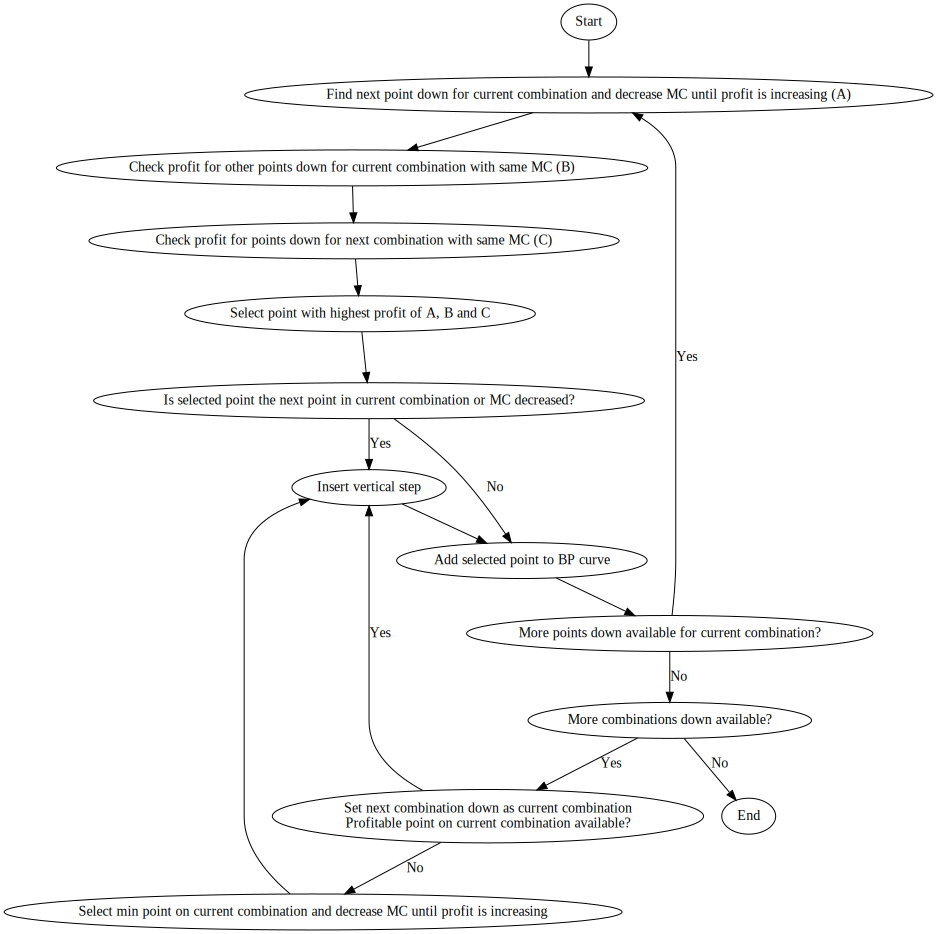

In [5]:
from graphviz import Digraph

g = Digraph(comment="Find profitable points down")

g.node('start', label="Start")
g.node('find_comb_next_point_down', label="Find next point down for current combination and decrease MC until profit is increasing (A)")
g.node('find_comb_other_point_down', label="Check profit for other points down for current combination with same MC (B)")
g.node('find_next_comb_point_down', label="Check profit for points down for next combination with same MC (C)")
g.node('select_bp_point_down', label="Select point with highest profit of A, B and C")
g.node('point_is_next_point', label="Is selected point the next point in current combination or MC decreased?")
g.node('insert_step_point_down', label="Insert vertical step")
g.node('add_selected_point', label="Add selected point to BP curve")
g.node('more_comb_points_down', label="More points down available for current combination?")
g.node('more_comb_down', label="More combinations down available?")
g.node('profitable_comb_point_down', label="Set next combination down as current combination \nProfitable point on current combination available?")
g.node('select_comb_min_point_down', label="Select min point on current combination and decrease MC until profit is increasing")
g.node('end', label="End")

g.edge('start', 'find_comb_next_point_down')
g.edge('find_comb_next_point_down', 'find_comb_other_point_down')
g.edge('find_comb_other_point_down', 'find_next_comb_point_down')
g.edge('find_next_comb_point_down', 'select_bp_point_down')
g.edge('select_bp_point_down', 'point_is_next_point')
g.edge('point_is_next_point', 'insert_step_point_down', "Yes")
g.edge('point_is_next_point', 'add_selected_point', "No")
g.edge('insert_step_point_down', 'add_selected_point')
g.edge('add_selected_point', 'more_comb_points_down')
g.edge('more_comb_points_down', 'more_comb_down', "No")
g.edge('more_comb_points_down', 'find_comb_next_point_down', "Yes")
g.edge('more_comb_down', 'profitable_comb_point_down', "Yes")
g.edge('more_comb_down', 'end', "No")
g.edge('profitable_comb_point_down', 'insert_step_point_down', "Yes")
g.edge('profitable_comb_point_down', 'select_comb_min_point_down', "No")
g.edge('select_comb_min_point_down', 'insert_step_point_down')

g

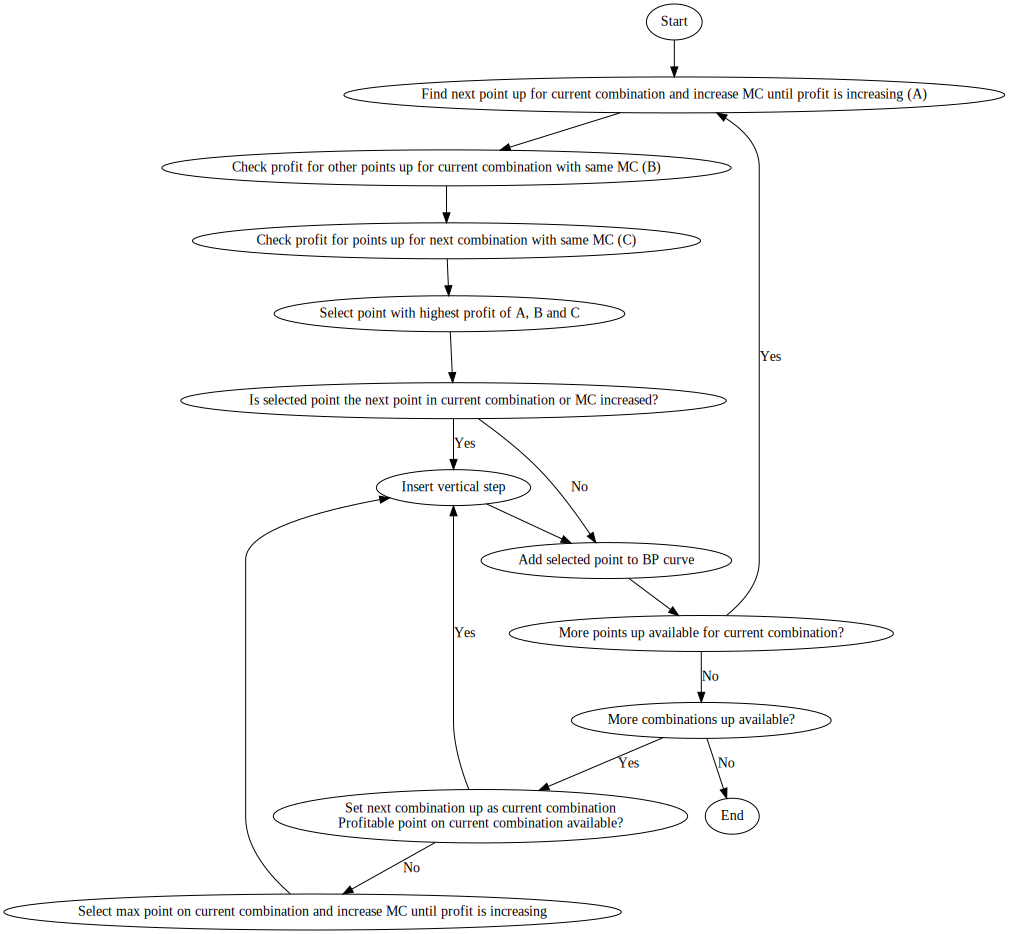

In [1]:
from graphviz import Digraph

g = Digraph(comment="Find profitable points up")

g.node('start', label="Start")
g.node('find_comb_next_point_up', label="Find next point up for current combination and increase MC until profit is increasing (A)")
g.node('find_comb_other_point_up', label="Check profit for other points up for current combination with same MC (B)")
g.node('find_next_comb_point_up', label="Check profit for points up for next combination with same MC (C)")
g.node('select_bp_point_up', label="Select point with highest profit of A, B and C")
g.node('point_is_next_point', label="Is selected point the next point in current combination or MC increased?")
g.node('insert_step_point_up', label="Insert vertical step")
g.node('add_selected_point', label="Add selected point to BP curve")
g.node('more_comb_points_up', label="More points up available for current combination?")
g.node('more_comb_up', label="More combinations up available?")
g.node('profitable_comb_point_up', label="Set next combination up as current combination \nProfitable point on current combination available?")
g.node('select_comb_max_point_up', label="Select max point on current combination and increase MC until profit is increasing")
g.node('end', label="End")

g.edge('start', 'find_comb_next_point_up')
g.edge('find_comb_next_point_up', 'find_comb_other_point_up')
g.edge('find_comb_other_point_up', 'find_next_comb_point_up')
g.edge('find_next_comb_point_up', 'select_bp_point_up')
g.edge('select_bp_point_up', 'point_is_next_point')
g.edge('point_is_next_point', 'insert_step_point_up', "Yes")
g.edge('point_is_next_point', 'add_selected_point', "No")
g.edge('insert_step_point_up', 'add_selected_point')
g.edge('add_selected_point', 'more_comb_points_up')
g.edge('more_comb_points_up', 'more_comb_up', "No")
g.edge('more_comb_points_up', 'find_comb_next_point_up', "Yes")
g.edge('more_comb_up', 'profitable_comb_point_up', "Yes")
g.edge('more_comb_up', 'end', "No")
g.edge('profitable_comb_point_up', 'insert_step_point_up', "Yes")
g.edge('profitable_comb_point_up', 'select_comb_max_point_up', "No")
g.edge('select_comb_max_point_up', 'insert_step_point_up')

g